In [1]:
# Getting packages ready for data preprocessing
import pandas as pd
import numpy as np
import random 
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.impute import SimpleImputer

## Firstly, Let us read the original data

In [167]:
# Getting and reading the data
df = pd.read_csv("Master.csv")
df

,RID,PTGENDER,Age,MHPSYCH,MH2NEURL,MH4CARD,MH6HEPAT,MH8MUSCL,MH9ENDO,MH10GAST,...,HMT102,RCT6,RCT11,RCT20,RCT392,CDGLOBAL,MMSCORE,LIMMTOTAL,LDELTOTAL,Diagnosis
0,2,1,74,0,1,0,0,0,0,0,...,34.3,37.844,90.080,173.993,0.916,0.0,30,16,14,1
1,3,2,76,1,0,0,0,0,0,1,...,34.2,18.021,129.715,251.322,0.792,0.0,30,9,11,1
2,4,2,93,0,0,1,0,1,0,0,...,34.2,52.261,86.477,216.524,1.018,0.0,27,9,2,1
3,5,1,82,0,0,1,0,0,1,0,...,34.0,33.038,108.096,162.393,1.131,0.5,30,10,0,2
4,10,1,90,0,0,0,0,0,0,0,...,35.1,33.639,126.112,158.526,1.131,1.0,21,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,1632,1,74,0,0,0,0,0,1,1,...,34.3,26.431,91.882,158.526,0.713,0.5,27,6,6,2
858,1634,1,78,0,0,0,0,0,1,1,...,33.6,25.830,97.286,185.592,0.781,-4.0,20,5,4,1
859,1636,1,67,0,0,1,0,0,1,0,...,34.5,25.830,214.390,162.393,0.826,0.5,28,3,3,2
860,1637,1,68,0,0,0,0,1,0,0,...,33.8,20.424,100.890,297.721,0.792,0.5,28,8,12,2


## Let us know what the data is all about

In [168]:
df.info() # Getting a quick information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RID        862 non-null    int64  
 1   PTGENDER   862 non-null    int64  
 2   Age        862 non-null    int64  
 3   MHPSYCH    862 non-null    int64  
 4   MH2NEURL   862 non-null    int64  
 5   MH4CARD    862 non-null    int64  
 6   MH6HEPAT   862 non-null    int64  
 7   MH8MUSCL   862 non-null    int64  
 8   MH9ENDO    862 non-null    int64  
 9   MH10GAST   862 non-null    int64  
 10  MH12RENA   862 non-null    int64  
 11  MH16SMOK   862 non-null    int64  
 12  MH17MALI   862 non-null    int64  
 13  APGEN1     862 non-null    int64  
 14  APGEN2     862 non-null    int64  
 15  AXT117     862 non-null    float64
 16  BAT126     862 non-null    float64
 17  HMT3       862 non-null    float64
 18  HMT7       862 non-null    float64
 19  HMT13      862 non-null    int64  
 20  HMT40     

## Let remove RID variable as it has not impact on Diagnosis 

In [169]:
# Removing RID varibale since it is only to join dataset together and does not realistically have an impact on Diagonsis.
df = df.drop(columns= "RID")

## Logistically sorting for Diagnosis. Healthy Control is set to zero and Non- Healthy Contol is set to 1.

In [170]:
#sorting for the classification of Diagnosis: HC(0), NonHC(1) 
for index, row in df.iterrows():
    if row["Diagnosis"] != 1:
        df.at[index, "Diagnosis"] = 1

    else:
        df.at[index, "Diagnosis"] = 0
df

,PTGENDER,Age,MHPSYCH,MH2NEURL,MH4CARD,MH6HEPAT,MH8MUSCL,MH9ENDO,MH10GAST,MH12RENA,...,HMT102,RCT6,RCT11,RCT20,RCT392,CDGLOBAL,MMSCORE,LIMMTOTAL,LDELTOTAL,Diagnosis
0,1,74,0,1,0,0,0,0,0,0,...,34.3,37.844,90.080,173.993,0.916,0.0,30,16,14,0
1,2,76,1,0,0,0,0,0,1,0,...,34.2,18.021,129.715,251.322,0.792,0.0,30,9,11,0
2,2,93,0,0,1,0,1,0,0,0,...,34.2,52.261,86.477,216.524,1.018,0.0,27,9,2,0
3,1,82,0,0,1,0,0,1,0,0,...,34.0,33.038,108.096,162.393,1.131,0.5,30,10,0,1
4,1,90,0,0,0,0,0,0,0,0,...,35.1,33.639,126.112,158.526,1.131,1.0,21,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,1,74,0,0,0,0,0,1,1,0,...,34.3,26.431,91.882,158.526,0.713,0.5,27,6,6,1
858,1,78,0,0,0,0,0,1,1,0,...,33.6,25.830,97.286,185.592,0.781,-4.0,20,5,4,0
859,1,67,0,0,1,0,0,1,0,0,...,34.5,25.830,214.390,162.393,0.826,0.5,28,3,3,1
860,1,68,0,0,0,0,1,0,0,0,...,33.8,20.424,100.890,297.721,0.792,0.5,28,8,12,1


## Let change PTGENDER to Gender

In [171]:
# Changing the column name to Gender
df = df.rename(columns={'PTGENDER': 'Gender'})
df

,Gender,Age,MHPSYCH,MH2NEURL,MH4CARD,MH6HEPAT,MH8MUSCL,MH9ENDO,MH10GAST,MH12RENA,...,HMT102,RCT6,RCT11,RCT20,RCT392,CDGLOBAL,MMSCORE,LIMMTOTAL,LDELTOTAL,Diagnosis
0,1,74,0,1,0,0,0,0,0,0,...,34.3,37.844,90.080,173.993,0.916,0.0,30,16,14,0
1,2,76,1,0,0,0,0,0,1,0,...,34.2,18.021,129.715,251.322,0.792,0.0,30,9,11,0
2,2,93,0,0,1,0,1,0,0,0,...,34.2,52.261,86.477,216.524,1.018,0.0,27,9,2,0
3,1,82,0,0,1,0,0,1,0,0,...,34.0,33.038,108.096,162.393,1.131,0.5,30,10,0,1
4,1,90,0,0,0,0,0,0,0,0,...,35.1,33.639,126.112,158.526,1.131,1.0,21,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,1,74,0,0,0,0,0,1,1,0,...,34.3,26.431,91.882,158.526,0.713,0.5,27,6,6,1
858,1,78,0,0,0,0,0,1,1,0,...,33.6,25.830,97.286,185.592,0.781,-4.0,20,5,4,0
859,1,67,0,0,1,0,0,1,0,0,...,34.5,25.830,214.390,162.393,0.826,0.5,28,3,3,1
860,1,68,0,0,0,0,1,0,0,0,...,33.8,20.424,100.890,297.721,0.792,0.5,28,8,12,1


#### The AIBL data was initially categorised into three clinical diagnostic results: Healthy Control (HC), Mild Cognitive Impairment (MCI), and Alzheimer’s Disease (AD). This reasearch work will consider two categories, HC (0)and Non- HC (1),combining MCI and AD.

## Getting a  statistical information of the data

In [172]:
df.describe() # Getting a quick statistical information of the data

,Gender,Age,MHPSYCH,MH2NEURL,MH4CARD,MH6HEPAT,MH8MUSCL,MH9ENDO,MH10GAST,MH12RENA,...,HMT102,RCT6,RCT11,RCT20,RCT392,CDGLOBAL,MMSCORE,LIMMTOTAL,LDELTOTAL,Diagnosis
count,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,...,862.000000,862.00000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000
mean,1.545244,77.682135,0.133411,0.073086,0.343387,-0.034803,0.412993,0.084687,0.171694,-0.046404,...,31.562529,34.25574,85.967305,192.643175,0.532390,0.215197,27.331787,10.488399,8.745940,0.293503
std,0.498238,7.090661,0.806231,0.626918,0.802404,0.579314,0.783819,0.736329,0.793842,0.662715,...,9.487784,14.03661,28.229245,67.122477,1.232408,0.413662,3.718165,5.061914,5.520668,0.455631
min,1.000000,58.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,...,-4.000000,-4.00000,-4.000000,-4.000000,-4.000000,-4.000000,0.000000,-4.000000,-4.000000,0.000000
25%,1.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,33.600000,28.98400,82.874000,170.126000,0.701000,0.000000,27.000000,7.000000,5.000000,0.000000
50%,2.000000,77.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,34.000000,34.84100,88.278000,201.058000,0.803000,0.000000,28.000000,11.000000,9.000000,0.000000
75%,2.000000,82.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,34.500000,41.44800,97.286000,231.990000,0.962000,0.500000,29.000000,14.000000,13.000000,1.000000
max,2.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,36.000000,115.33400,234.208000,367.317000,1.923000,3.000000,30.000000,23.000000,23.000000,1.000000


## Minimum values of some variable are negative. This has to be removed, beacuse negative values in a dataset of medical test results may indicate errors which would affect adversely the result of the research work. 

In [173]:
# Dropping all negative values
nega_data = []

for row in df:
    nega_data.append(df[df[row] < 0].index) # get all row index that has negative number and save in nega_data
    
    
nega_store=np.concatenate(nega_data) # join all lists to  big list
dup_store =[]
for num in nega_store:
    if num not in dup_store: #remove duplicates
        dup_store.append(num)

dup_store
for row in dup_store:
    df.drop(row, inplace= True) # drop numbers with negative 


In [174]:
df.describe() # Getting a quick statistical information of the data

,Gender,Age,MHPSYCH,MH2NEURL,MH4CARD,MH6HEPAT,MH8MUSCL,MH9ENDO,MH10GAST,MH12RENA,...,HMT102,RCT6,RCT11,RCT20,RCT392,CDGLOBAL,MMSCORE,LIMMTOTAL,LDELTOTAL,Diagnosis
count,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,...,454.00000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,1.528634,78.288546,0.310573,0.167401,0.442731,0.041850,0.488987,0.176211,0.299559,0.066079,...,34.09163,36.744540,92.449062,209.923698,0.879934,0.254405,27.066079,9.610132,7.678414,0.372247
std,0.499730,7.600569,0.463239,0.373745,0.497257,0.200468,0.500430,0.381420,0.458570,0.248695,...,0.59588,10.057237,13.575131,42.047288,0.187269,0.355860,3.511576,4.864611,5.241002,0.483937
min,1.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,32.00000,16.219000,46.842000,92.796000,0.452000,0.000000,7.000000,0.000000,0.000000,0.000000
25%,1.000000,73.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,33.70000,30.035000,84.675000,177.859000,0.758000,0.000000,26.000000,6.000000,3.000000,0.000000
50%,2.000000,78.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,34.10000,34.841000,90.080000,212.657000,0.871000,0.000000,28.000000,10.000000,8.000000,0.000000
75%,2.000000,84.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,34.50000,41.448000,97.286000,235.856000,1.018000,0.500000,29.000000,13.000000,12.000000,1.000000
max,2.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,35.90000,115.334000,196.374000,332.519000,1.923000,2.000000,30.000000,23.000000,23.000000,1.000000


#### The result of removing negative numbers is the acquistion of 454 observations and 31 variables for the research.

 # The data needs normalization. We will Min-Max normalization

In [175]:
#Get feature variables for Min-Max Normalization
random.seed(14)

X = df.iloc[:, :-1]  #getting the features
y = df.iloc[:,-1]    # getting target variable

X_values = X.values  # getting features values for normalization

# Normalize
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X.values)

# convert the normalized values into the features data
normal_X =  pd.DataFrame(X_norm, columns=X.columns)

# adding diagonis, Age and Gender to make the data ready for use
normal_X.insert(loc= 30, column='Diagnosis', value=y.values)

df = normal_X
df

,Gender,Age,MHPSYCH,MH2NEURL,MH4CARD,MH6HEPAT,MH8MUSCL,MH9ENDO,MH10GAST,MH12RENA,...,HMT102,RCT6,RCT11,RCT20,RCT392,CDGLOBAL,MMSCORE,LIMMTOTAL,LDELTOTAL,Diagnosis
0,1.0,0.428571,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.564103,0.018181,0.554216,0.661288,0.231135,0.00,1.000000,0.391304,0.478261,0
1,1.0,0.833333,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.564103,0.363638,0.265060,0.516129,0.384772,0.00,0.869565,0.391304,0.086957,0
2,0.0,0.571429,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.512821,0.169692,0.409638,0.290323,0.461591,0.25,1.000000,0.434783,0.000000,1
3,0.0,0.761905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.794872,0.175755,0.530121,0.274191,0.461591,0.50,0.608696,0.130435,0.000000,1
4,0.0,0.690476,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.769231,0.248489,0.240965,0.209675,0.384772,0.25,0.913043,0.130435,0.173913,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,0.0,0.595238,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.282051,0.133330,0.493975,0.129032,0.331067,0.50,0.565217,0.043478,0.000000,1
450,0.0,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.538462,0.254543,0.301206,0.532260,0.469069,0.25,0.826087,0.173913,0.130435,1
451,0.0,0.595238,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.179487,0.090905,0.253009,0.532260,0.161795,0.25,0.739130,0.130435,0.000000,1
452,1.0,0.476190,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.410256,0.103032,0.301206,0.516129,0.131203,0.25,0.869565,0.217391,0.000000,1


## Checking for outliers

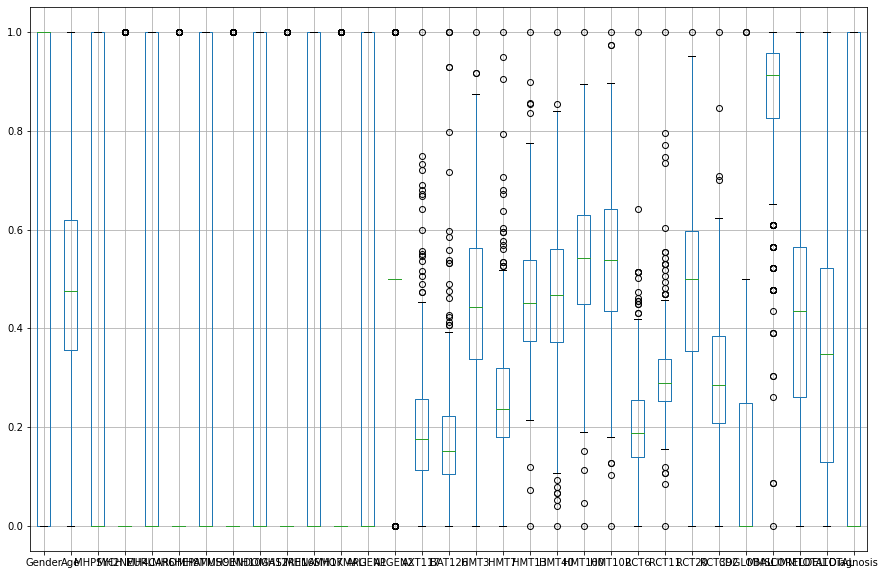

In [176]:
# Checking for outliers

plt.figure(figsize=(15, 10))
df.boxplot()
plt.show()

### Outliers exist and need to be treated by mean. Using for loop to repeat 6 times untill outliers are being replaced by mean. 

In [177]:
random.seed(14)
for _ in range (9):
    outlier_cols = X
    for col in outlier_cols:
        # calculate IQR and set cutoff value for outliers
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        high_cutoff = q3 + 1.5 * iqr
        low_cutoff = q1 - 1.5 * iqr

        # replace outliers with null values
        df.loc[df[col] > high_cutoff, col] = np.nan
        df.loc[df[col] < low_cutoff, col] = np.nan

    
    
    
    ## Treating outlier with mean values
    outlier_col = df.iloc[:,[3,5,7,9,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]].values
    imputer = SimpleImputer(missing_values= np.nan, strategy= "mean")
    imputer.fit(outlier_col)
    outlier_col =imputer.transform(outlier_col)
    df.iloc[:,[3,5,7,9,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]] = outlier_col

In [178]:
df

,Gender,Age,MHPSYCH,MH2NEURL,MH4CARD,MH6HEPAT,MH8MUSCL,MH9ENDO,MH10GAST,MH12RENA,...,HMT102,RCT6,RCT11,RCT20,RCT392,CDGLOBAL,MMSCORE,LIMMTOTAL,LDELTOTAL,Diagnosis
0,1.0,0.428571,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.564103,0.018181,0.294351,0.661288,0.231135,0.00,1.000000,0.391304,0.478261,0
1,1.0,0.833333,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.564103,0.363638,0.265060,0.516129,0.384772,0.00,0.869565,0.391304,0.086957,0
2,0.0,0.571429,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.512821,0.169692,0.409638,0.290323,0.461591,0.25,1.000000,0.434783,0.000000,1
3,0.0,0.761905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.794872,0.175755,0.294351,0.274191,0.461591,0.50,0.908967,0.130435,0.000000,1
4,0.0,0.690476,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.769231,0.248489,0.240965,0.209675,0.384772,0.25,0.913043,0.130435,0.173913,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,0.0,0.595238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.282051,0.133330,0.294351,0.129032,0.331067,0.50,0.908967,0.043478,0.000000,1
450,0.0,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.538462,0.254543,0.301206,0.532260,0.469069,0.25,0.826087,0.173913,0.130435,1
451,0.0,0.595238,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.179487,0.090905,0.253009,0.532260,0.161795,0.25,0.739130,0.130435,0.000000,1
452,1.0,0.476190,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.410256,0.103032,0.301206,0.516129,0.131203,0.25,0.869565,0.217391,0.000000,1


## Let check again for outliers after iterating the code 9 times

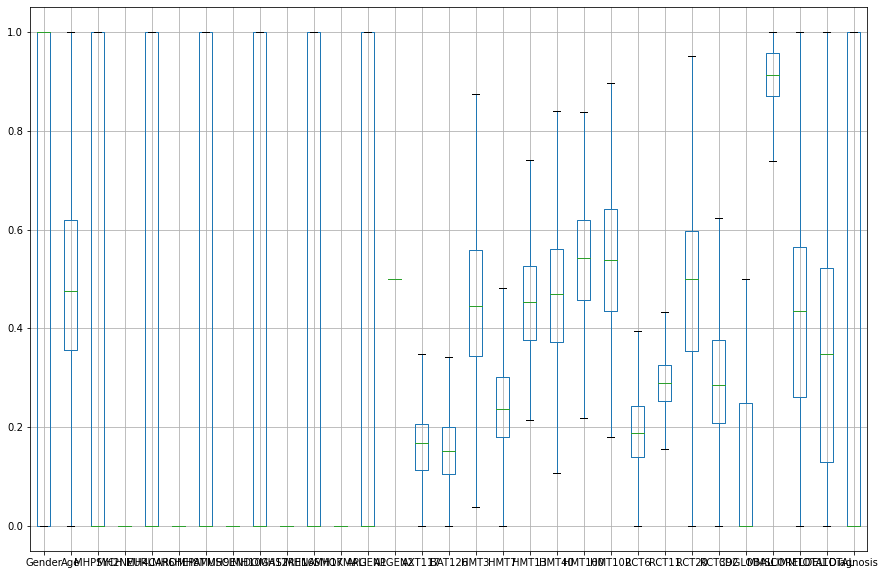

,Gender,Age,MHPSYCH,MH2NEURL,MH4CARD,MH6HEPAT,MH8MUSCL,MH9ENDO,MH10GAST,MH12RENA,...,HMT102,RCT6,RCT11,RCT20,RCT392,CDGLOBAL,MMSCORE,LIMMTOTAL,LDELTOTAL,Diagnosis
0,1.0,0.428571,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.564103,0.018181,0.294351,0.661288,0.231135,0.00,1.000000,0.391304,0.478261,0
1,1.0,0.833333,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.564103,0.363638,0.265060,0.516129,0.384772,0.00,0.869565,0.391304,0.086957,0
2,0.0,0.571429,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.512821,0.169692,0.409638,0.290323,0.461591,0.25,1.000000,0.434783,0.000000,1
3,0.0,0.761905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.794872,0.175755,0.294351,0.274191,0.461591,0.50,0.908967,0.130435,0.000000,1
4,0.0,0.690476,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.769231,0.248489,0.240965,0.209675,0.384772,0.25,0.913043,0.130435,0.173913,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,0.0,0.595238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.282051,0.133330,0.294351,0.129032,0.331067,0.50,0.908967,0.043478,0.000000,1
450,0.0,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.538462,0.254543,0.301206,0.532260,0.469069,0.25,0.826087,0.173913,0.130435,1
451,0.0,0.595238,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.179487,0.090905,0.253009,0.532260,0.161795,0.25,0.739130,0.130435,0.000000,1
452,1.0,0.476190,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.410256,0.103032,0.301206,0.516129,0.131203,0.25,0.869565,0.217391,0.000000,1


In [179]:
# Checking for outliers after treating it with mean
plt.figure(figsize=(15, 10))
df.boxplot()
plt.show()
df

### After replacing the outliers with the mean 9 times, No outliers found

## Checking and treating if imbalanced data exists

0    285
1    169
Name: Diagnosis, dtype: int64
0    0.627753
1    0.372247
Name: Diagnosis, dtype: float64


<AxesSubplot:ylabel='Diagnosis'>

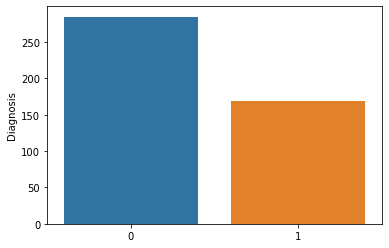

In [109]:
# Checking for imbalanced data
# Getting features and target variable for work with
random.seed(14)

print(y.value_counts())
print(y.value_counts()/ len(df))

sns.barplot(x = ["0", "1"],y = y.value_counts()) # plotting the bar plot

##### As the data is imbalanced, Healthy control containing the major values of 285 and Non healthy control having 168 observations. There is need to introduce SMOTE (Synthetic Minority Oversampling Technique) to balance the data

In [110]:
df

,Gender,Age,MHPSYCH,MH2NEURL,MH4CARD,MH6HEPAT,MH8MUSCL,MH9ENDO,MH10GAST,MH12RENA,...,HMT102,RCT6,RCT11,RCT20,RCT392,CDGLOBAL,MMSCORE,LIMMTOTAL,LDELTOTAL,Diagnosis
0,1.0,0.428571,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.564103,0.018181,0.294351,0.661288,0.231135,0.00,1.000000,0.391304,0.478261,0
1,1.0,0.833333,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.564103,0.363638,0.265060,0.516129,0.384772,0.00,0.869565,0.391304,0.086957,0
2,0.0,0.571429,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.512821,0.169692,0.409638,0.290323,0.461591,0.25,1.000000,0.434783,0.000000,1
3,0.0,0.761905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.794872,0.175755,0.294351,0.274191,0.461591,0.50,0.908967,0.130435,0.000000,1
4,0.0,0.690476,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.769231,0.248489,0.240965,0.209675,0.384772,0.25,0.913043,0.130435,0.173913,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,0.0,0.595238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.282051,0.133330,0.294351,0.129032,0.331067,0.50,0.908967,0.043478,0.000000,1
450,0.0,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.538462,0.254543,0.301206,0.532260,0.469069,0.25,0.826087,0.173913,0.130435,1
451,0.0,0.595238,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.179487,0.090905,0.253009,0.532260,0.161795,0.25,0.739130,0.130435,0.000000,1
452,1.0,0.476190,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.410256,0.103032,0.301206,0.516129,0.131203,0.25,0.869565,0.217391,0.000000,1


0    285
1    285
Name: Diagnosis, dtype: int64
0    0.5
1    0.5
Name: Diagnosis, dtype: float64


<AxesSubplot:ylabel='Diagnosis'>

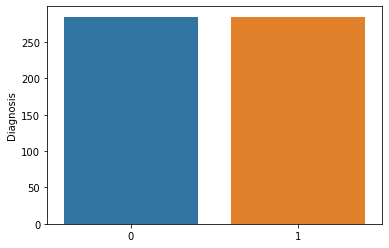

In [111]:
# Applying smote to the data
random.seed(14)
X = df.iloc[:, :-1]  #getting the features
y = df.iloc[:,-1]    # getting target variable
sm = SMOTE(random_state=2)
X, y = sm.fit_resample(X, y)

print(y.value_counts())
print(y.value_counts()/ len(y))


sns.barplot(x = ["0", "1"],y = y.value_counts())

In [112]:
# setting a balanced data
random.seed(14)

df= X  # giving the data a new dataset of X (explanatory variables)
df.insert(loc= 30, column='Diagnosis', value=y.values) # adding the target variable 
df

,Gender,Age,MHPSYCH,MH2NEURL,MH4CARD,MH6HEPAT,MH8MUSCL,MH9ENDO,MH10GAST,MH12RENA,...,HMT102,RCT6,RCT11,RCT20,RCT392,CDGLOBAL,MMSCORE,LIMMTOTAL,LDELTOTAL,Diagnosis
0,1.0,0.428571,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.564103,0.018181,0.294351,0.661288,0.231135,0.000000,1.000000,0.391304,0.478261,0
1,1.0,0.833333,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.564103,0.363638,0.265060,0.516129,0.384772,0.000000,0.869565,0.391304,0.086957,0
2,0.0,0.571429,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.512821,0.169692,0.409638,0.290323,0.461591,0.250000,1.000000,0.434783,0.000000,1
3,0.0,0.761905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.794872,0.175755,0.294351,0.274191,0.461591,0.500000,0.908967,0.130435,0.000000,1
4,0.0,0.690476,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.769231,0.248489,0.240965,0.209675,0.384772,0.250000,0.913043,0.130435,0.173913,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,0.0,0.709147,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.437299,0.215729,0.238035,0.496518,0.275379,0.250000,0.803754,0.216203,0.106913,1
566,1.0,0.383815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.613329,0.156363,0.278556,0.485164,0.204785,0.378857,0.908967,0.027824,0.027824,1
567,1.0,0.782722,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.564908,0.196903,0.280995,0.552580,0.196473,0.250000,0.915776,0.155777,0.042112,1
568,1.0,0.587083,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.333333,0.232573,0.282278,0.592647,0.222365,0.278543,0.874064,0.361520,0.115543,1


#### There is now a balance in the data. HC and NonHC having equal sharing rate of 0.5. The data is good to be used. This make our research t work with 570 observations compared to the initial 454 observations.

## Filtering features using Information gain

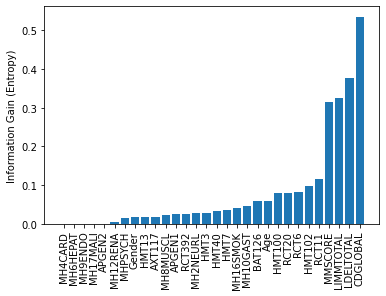

In [113]:
## Sorting Feature selection through information gain or Entropy
np.random.seed(14)

X = df.iloc[:, :-1]  #getting the features
y = df.iloc[:,-1]    # getting target variable

mi = mutual_info_classif(X, y)
# create a dictionary that maps each feature name to its corresponding information gain (entropy) score
feature_dict = {feature: mi_score for feature, mi_score in zip(X.columns, mi)}

# sort the dictionary by the information gain (entropy) score in descending order
sorted_feature_dict = dict(sorted(feature_dict.items(), key=lambda item: item[1], reverse=False))

plt.bar(sorted_feature_dict.keys(), sorted_feature_dict.values())
plt.xticks(rotation=90)
plt.ylabel('Information Gain (Entropy)')
plt.show()

#### After checking for information gain from expanatory variables, the research will make use of 25 explanatory variables as they are the only ones relevant to the target variable Diagnosis.

In [114]:
# Dropping irrelevant variables 
df = df.drop(columns = ["MH6HEPAT", "MH9ENDO", "MH17MALI", "APGEN2", "MH4CARD"], axis = 1)
df

,Gender,Age,MHPSYCH,MH2NEURL,MH8MUSCL,MH10GAST,MH12RENA,MH16SMOK,APGEN1,AXT117,...,HMT102,RCT6,RCT11,RCT20,RCT392,CDGLOBAL,MMSCORE,LIMMTOTAL,LDELTOTAL,Diagnosis
0,1.0,0.428571,1.0,0.0,0.0,1.0,0.0,0.000000,1.0,0.135052,...,0.564103,0.018181,0.294351,0.661288,0.231135,0.000000,1.000000,0.391304,0.478261,0
1,1.0,0.833333,0.0,0.0,1.0,0.0,0.0,1.000000,0.0,0.137113,...,0.564103,0.363638,0.265060,0.516129,0.384772,0.000000,0.869565,0.391304,0.086957,0
2,0.0,0.571429,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.141237,...,0.512821,0.169692,0.409638,0.290323,0.461591,0.250000,1.000000,0.434783,0.000000,1
3,0.0,0.761905,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,0.182588,...,0.794872,0.175755,0.294351,0.274191,0.461591,0.500000,0.908967,0.130435,0.000000,1
4,0.0,0.690476,0.0,0.0,1.0,0.0,0.0,0.000000,1.0,0.251546,...,0.769231,0.248489,0.240965,0.209675,0.384772,0.250000,0.913043,0.130435,0.173913,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,0.0,0.709147,0.0,0.0,1.0,0.0,0.0,1.000000,1.0,0.125207,...,0.437299,0.215729,0.238035,0.496518,0.275379,0.250000,0.803754,0.216203,0.106913,1
566,1.0,0.383815,0.0,0.0,0.0,0.0,0.0,0.319973,0.0,0.127671,...,0.613329,0.156363,0.278556,0.485164,0.204785,0.378857,0.908967,0.027824,0.027824,1
567,1.0,0.782722,0.0,0.0,1.0,0.0,0.0,0.322860,0.0,0.194257,...,0.564908,0.196903,0.280995,0.552580,0.196473,0.250000,0.915776,0.155777,0.042112,1
568,1.0,0.587083,1.0,0.0,1.0,1.0,0.0,0.000000,1.0,0.148202,...,0.333333,0.232573,0.282278,0.592647,0.222365,0.278543,0.874064,0.361520,0.115543,1


#### Data for the research is now set. Having 26 variables from 32 and 570 observations from 862.

In [115]:
df.to_csv(r'Master2.csv',index = False) #export clean data into an excel file